In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.ion()

import sys
sys.path.append('/Users/jkinney/github/')
import logomaker

In [2]:
in_file = 'Pfam_wwdomain.fa'
with open(in_file, 'r') as f:
    text = f.read()
    lines = text.split('\n')
    seqs = [l.strip().upper() for l in lines if '#' not in l and '>' not in l and len(l.strip())>0]
    
print('We have %d WW domain seqs'%len(seqs))
seqs[:10]

We have 4025 WW domain seqs


['LPPQW..TEA.VDVDT...GKFYFVHVET.......KETRWERP',
 '--PGW..TAT.VDPAS...GRTYYYHAAT.......GETRWEPP',
 'LPSGW..VEQ.TDPSS...GRPYYYHNAS.......NLTQWERP',
 'LPAGW..VAA.NDPSS...GRTYYYHAES.......GVTSWNPP',
 'LPNGW..QEL.VDPSS...GSTYYYNEVN.......GTTSWDRP',
 'LPEGW..VEL.VHESS...GKTYYFHAED.......NVTSWEQP',
 'LPQGW..IEA.VDPST...EATYYINEVE.......GITSWERP',
 'LPPGW..AKL.THPDS...GDAYYYNEAT.......NATSWDIP',
 '--TGW..EAL.VDEAS...GAIYYYNKLD.......GTSSWERP',
 'LPEGW..IEV.MDPNS...GSVYYFNEVD.......GTSSWDKP']

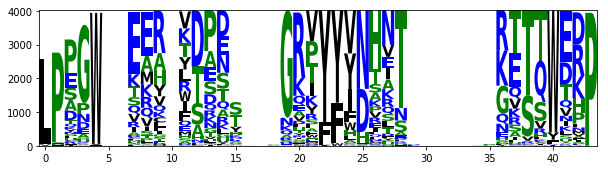

In [3]:
# Create counts matrix
counts_df = logomaker.alignment_to_matrix(seqs,characters_to_ignore='.-X')
logomaker.Logo(counts_df)

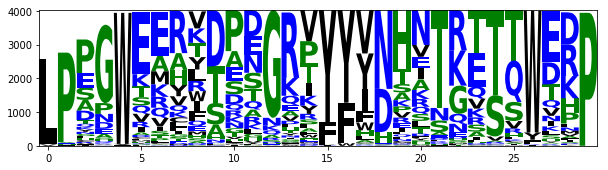

In [4]:
# Filter base on counts
num_seqs = counts_df.sum(axis=1)
pos_to_keep = num_seqs > len(seqs)/2
counts_df = counts_df[pos_to_keep]
counts_df.reset_index(drop=True, inplace=True)

# Illustrate counts matrix
logomaker.Logo(counts_df)

Done! Output written to Example_WW.pdf.


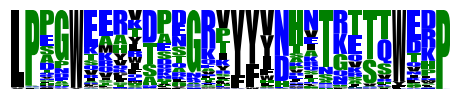

In [5]:
# Create figure and axes objects
fig, ax = plt.subplots(figsize=[6.5,1.5])

prob_mat = logomaker.transform_matrix(counts_df, from_type='counts', to_type='probability')
logo = logomaker.Logo(prob_mat, font_name='Impact', ax=ax)
#logo.style_spines(spines=['top','bottom'], visible=True)
logo.style_spines(visible=False)
ax.set_yticks([])
ax.set_xticks([])

# Tight layout
plt.tight_layout()

# Save as pdf
out_file = 'Example_WW.pdf'
fig.savefig(out_file)
print('Done! Output written to %s.'%out_file)